# Spectral Theorem - Explained Geometrically

## Background
The spectral theorem states that any symmetric matrix implements a map with the following properties:
- It implements a rotation
- It then implements  a non uniform scaling along the new axes, i.e. along *orthogonal directions*
- It then implements a rotation along the same angle as the first one, in the opposite direction.

In matrix notation, any symmetric matrix $\mathcal{M}$ can be written as:
$$
\mathcal{M} = \left( \begin{array}{rr} \cos \theta & \sin \theta \\ -\sin \theta & \cos \theta \end{array} \right) \left( \begin{array}{rr} \sigma_1 &  0 \\ 0 & \sigma_2 \end{array} \right) \left( \begin{array}{rr} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{array} \right)
$$
 In the process, wei will discorver the *SVD decomposition*, which is of vital importance to data science and scientific computation in general.

## Relevance to Data Science
This already has been pointed out in another notebook 'Eigenvectors of the Covariance Matrix'. The covariance matrix is symmetric. Moreover,
it is positive definite, meaning that it has no negative eigenvalues. Here, we will show why the eigenvectors when grouped as a matrix form a rotation matrix and why the values $\sigma_1$ and $\sigma_2$ are the eigenvalues of $\mathcal{M}. This means that in any dataset, the eigenvectors are the directions along which the dataset are the most pronounced, the eigenvalues are a measure for how far the dataset extends along the eigenvectors. Moreover, the eigenvectors are orthogonal.

Since all of these properties are essential to understanding *principal component analysis*, we will explain them here.

## Objectives
In this notebook we will
- Provide a geometric proof of the SVD decomposition
- Show show the Spectral Theorem follows from that
- Show how python code can be used to perform the SVD decomposition and the eigenvector decomposition of symmetric matrices

## Learning Outcomes
By the end of the notebook you should be able
- to apply the apply SVD decomposition in your own work
- explain the content of the spectral theorem
- explain how the spectral theorem underpins principal component analysis

## Sources
The explanation provided for the SVD decomposition is from:
- Tristan Needham, *Visual Differential Geometry and Forms*, 2021, Princeton

A good elementary source on conic sections is:
- Brannan, Esplen and Gray, *Geometry*, 1999, Cambridge University Press

   

## Any Linear Map Always Maps the Unit Circle to an Ellipse

In this notebook, we will call the map implemented by a matrix a linear map. Sometimes we will treat these terms as synonimes, where this doesn't cause confusion.

**If there is anything you take away from this notebook, let it be this this.**

Let's first illustrate this by a few examples.


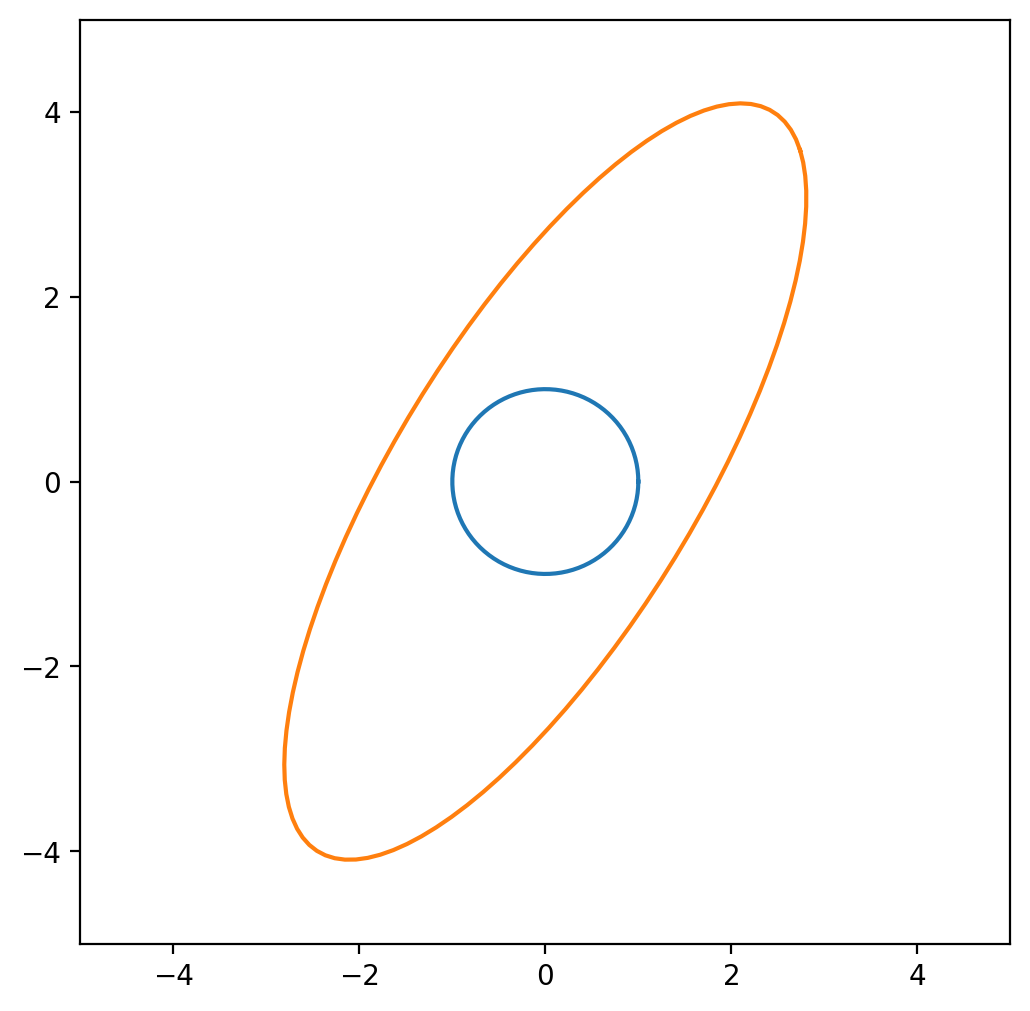

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams['figure.dpi'] = 200


seed = 42
low  = -5.
high =  5.
rng = np.random.default_rng(seed)


def generate_unit_circle(N_points = 100):
    theta = np.linspace(0, 2*np.pi, N_points)
    x = np.cos(theta)
    y = np.sin(theta)
    return x, y

def generate_some_random_matrix_in_the_plane(rng = rng, low = -10, high=10):
    # Generate a 2x2 matrix with elements uniformly sampled from [-10, 10]
    matrix = rng.uniform(low, high, size=(2, 2))
    return matrix

fig = plt.figure()
ax=fig.add_subplot(111)
x,y = generate_unit_circle()
plt.plot(x,y)

m=generate_some_random_matrix_in_the_plane(low=low, high=high)
# python broadcasting allows the application to all points at once!
data=np.array([x,y])
transformed = m.dot(data)

# these are the right points. let's plot the transformed array
ax.set_xlim(xmin=low, xmax=high)
ax.set_ylim(ymin=low, ymax=high)

plt.plot(transformed[0], transformed[1])



Let's redo this experiment a number of times.

<Figure size 1200x1200 with 0 Axes>

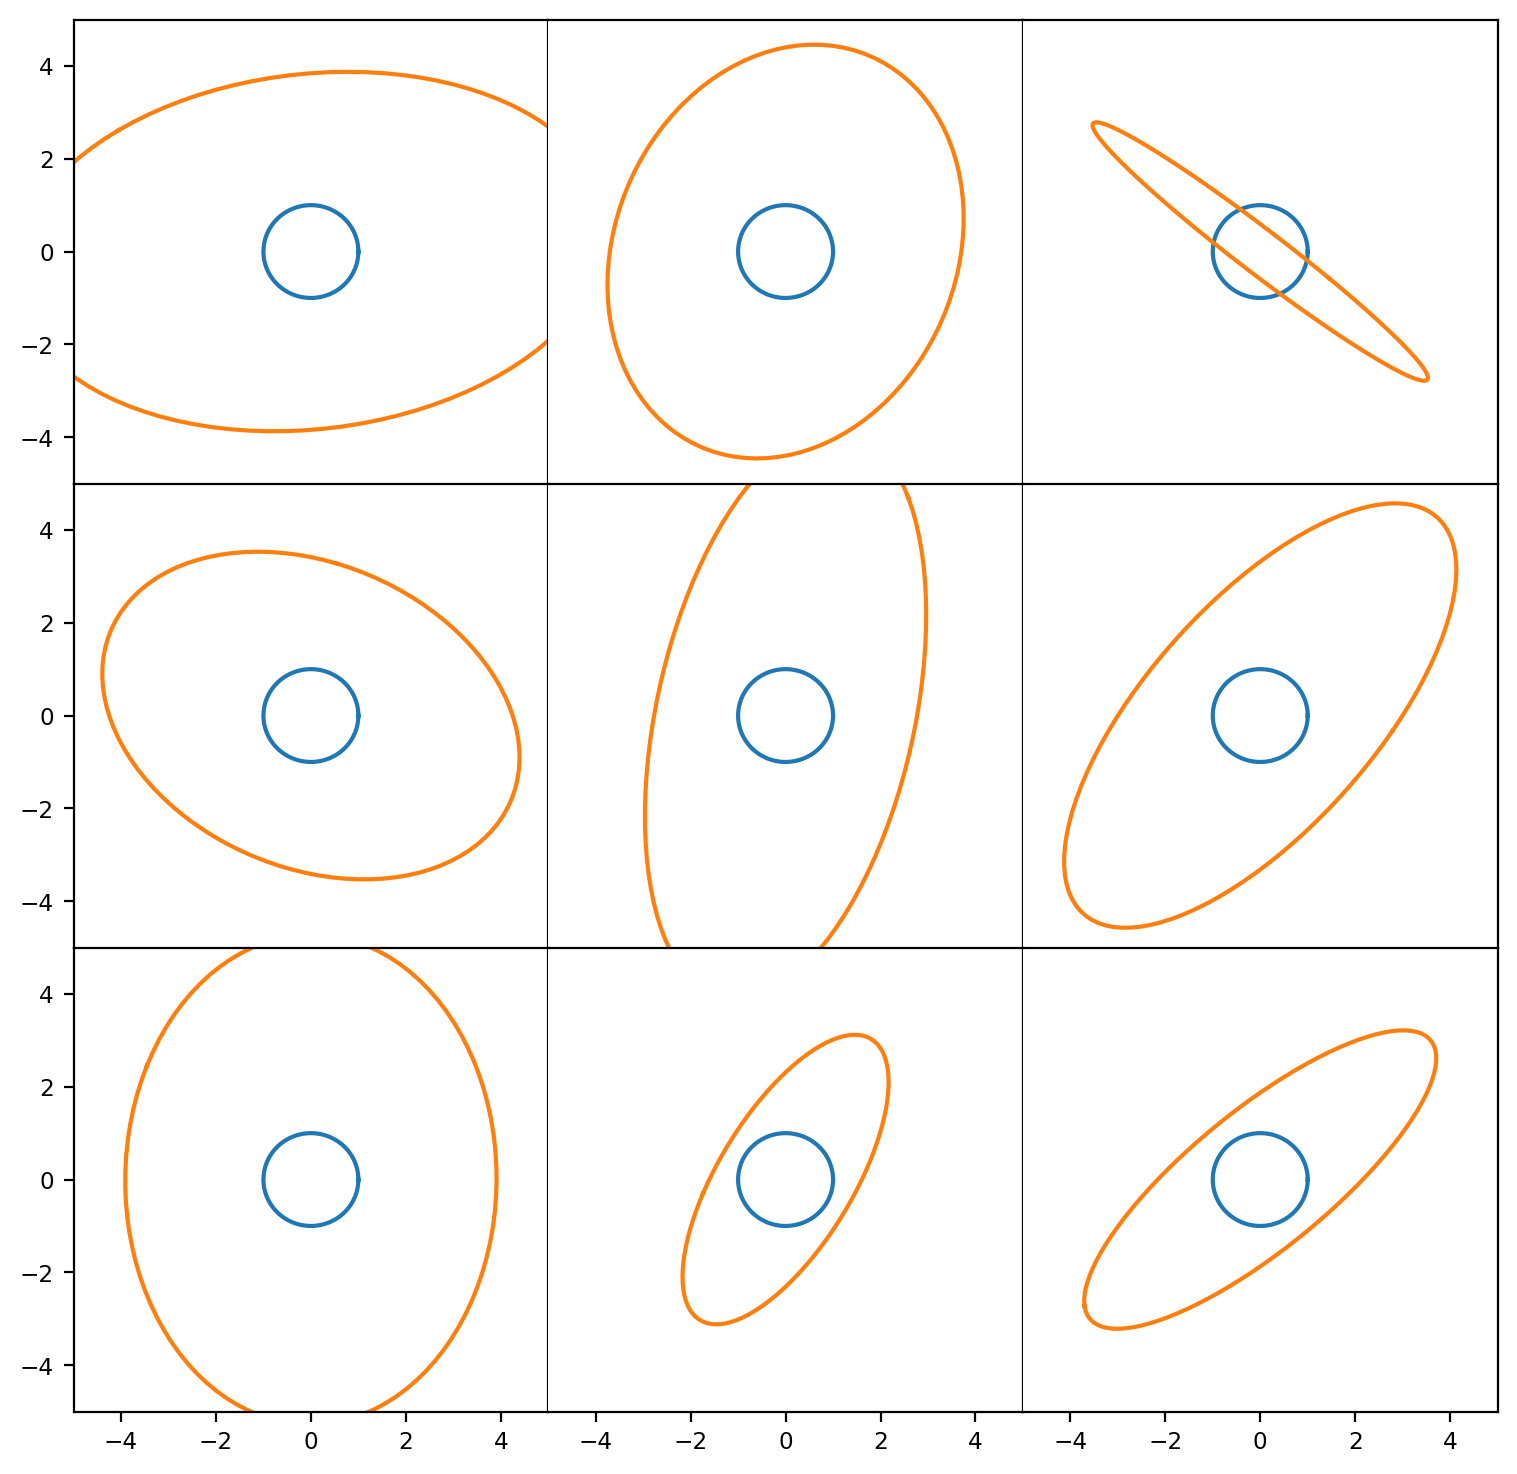

In [2]:
figure2 = plt.figure()


# Create a figure and subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))


# Loop over axes and plot data
for i, ax in enumerate(axes.flat):

    ax.plot(x,y)
    m=generate_some_random_matrix_in_the_plane(low=low, high=high)
    # python broadcasting allows the application to all points at once
    data=np.array([x,y])
    transformed = m.dot(data)
    ax.plot(transformed[0], transformed[1])
   
    
    # Compute row and column indices
    row = i // 3
    col = i % 3
    
    # Remove x-axis labels for all but bottom row
    if row < 2:
        ax.set_xticks([])
    else:
        # Make x-axis tick labels smaller
        ax.tick_params(axis='x', labelsize='small')
    
    # Remove y-axis labels for all but leftmost column
    if col > 0:
        ax.set_yticks([])
    else:
        # Make y-axis tick labels smaller
        ax.tick_params(axis='y', labelsize='small')
    
    # Remove spines between internal plots
    if col > 0:
        ax.spines['left'].set_visible(False)
    if row < 2:
        ax.spines['bottom'].set_visible(False)
    
    # Set consistent limits for all plots
    ax.set_xlim(low, high)
    ax.set_ylim(low, high)

    # Remove space between subplots and adjust margins
    plt.subplots_adjust(wspace=0, hspace=0, left=0.08, right=0.97, top=0.95, bottom=0.08)



Hopefully, this demonstration is convincing!  **Any matrix maps the unit circle to an ellipse**. And the main axes
of an ellipse are perpendicular. As we will see, this will go a long way towards explaining why the eigenvector of a symmetrix matrix are prependicular.

If you're happy with this explanation, you can skip the rest of this paragraph and move onto *The SVD Decomposition*


But why are ellipses produced? The explanation of this relies on a result from geometry. An arbitrary matrix maps the unit circle to an expression that is quadratic in $x$ and $y$. This is easy to show.
In the following we will assume that matrices are invertible, i.e. their determinant is unequal to 0. The statement is also true for
degenerate matrices, matrices that are not invertible, since they map the unit circle to a line or a point, which can be considered to be degenerate ellipses. With that out of the way, let's proceed.


Given a matrix $M$
$$
M = \begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
$$
applied to variavbles $(x,y)$
$$
\begin{pmatrix}
x' \\
y'
\end{pmatrix}
= M
\begin{pmatrix}
x \\
y
\end{pmatrix}
$$
so
$$
\begin{cases}
x' = a x + b y, \\
y' = c x + d y.
\end{cases}
$$
We know that $(x,y)$ were not arbitrary points, but were on the unit circle: $x^2 + y^2 =1$

It's not difficult then show that this condition translate to a quadratic equation:
$$
A x'^2 - 2 BC x' y' + C y'^2 = D^2
$$
Where:
$$
\begin{aligned}
A &= c^2 + d^2, \\
B &= a c + b d, \\
C &= a^2 + b^2, \\
D &= ad - bc.
\end{aligned}
$$
Such an equation is called a conic section. It is well known [Brannan, Espen, Gray, 1999] in geometry that a conic section can describe one of three classes of shapes: ellipses, hyperbolas or parabolas. The latter two can be ruled out even without doing any calculations. Hyperbolas and Parabolas extend do infinity, so at least one point of the unit circle should be transformed to infinity. But in
$$
\begin{pmatrix}
x' \\
y'
\end{pmatrix}
= M
\begin{pmatrix}
x \\
y
\end{pmatrix}
$$
the values $(x, y)$ are on the unit circle, so finite, and $a, b, c$ and $a$ are all finite. The conic section must be an ellipse. 

## The SVD Decomposition

[Needham] formulates the SVD decomposition as follows:

**Singular Value Decomposition.** Every linear transformation of the plane is equivalent to streching in two orthogonal directions (by generally different factors, $\sigma_1$ and $\sigma_2$, called the  **singular values**), followed by a rotation through an angle $\tau$ which [Needham] calls twist.

Take a moment to think through this statement. We know that a linear map maps the unit circle maps to an ellipse and the operations described here specify a sequence that morphs a circle into an ellipse: First you strech the circle in *orthonomal* directions (otherwise it is not an ellipse; the major axes of an ellipse are perpendicular), then rotate it so that you bring it in its desired orientation.

### Geometric Proof (Optional, after Needham)




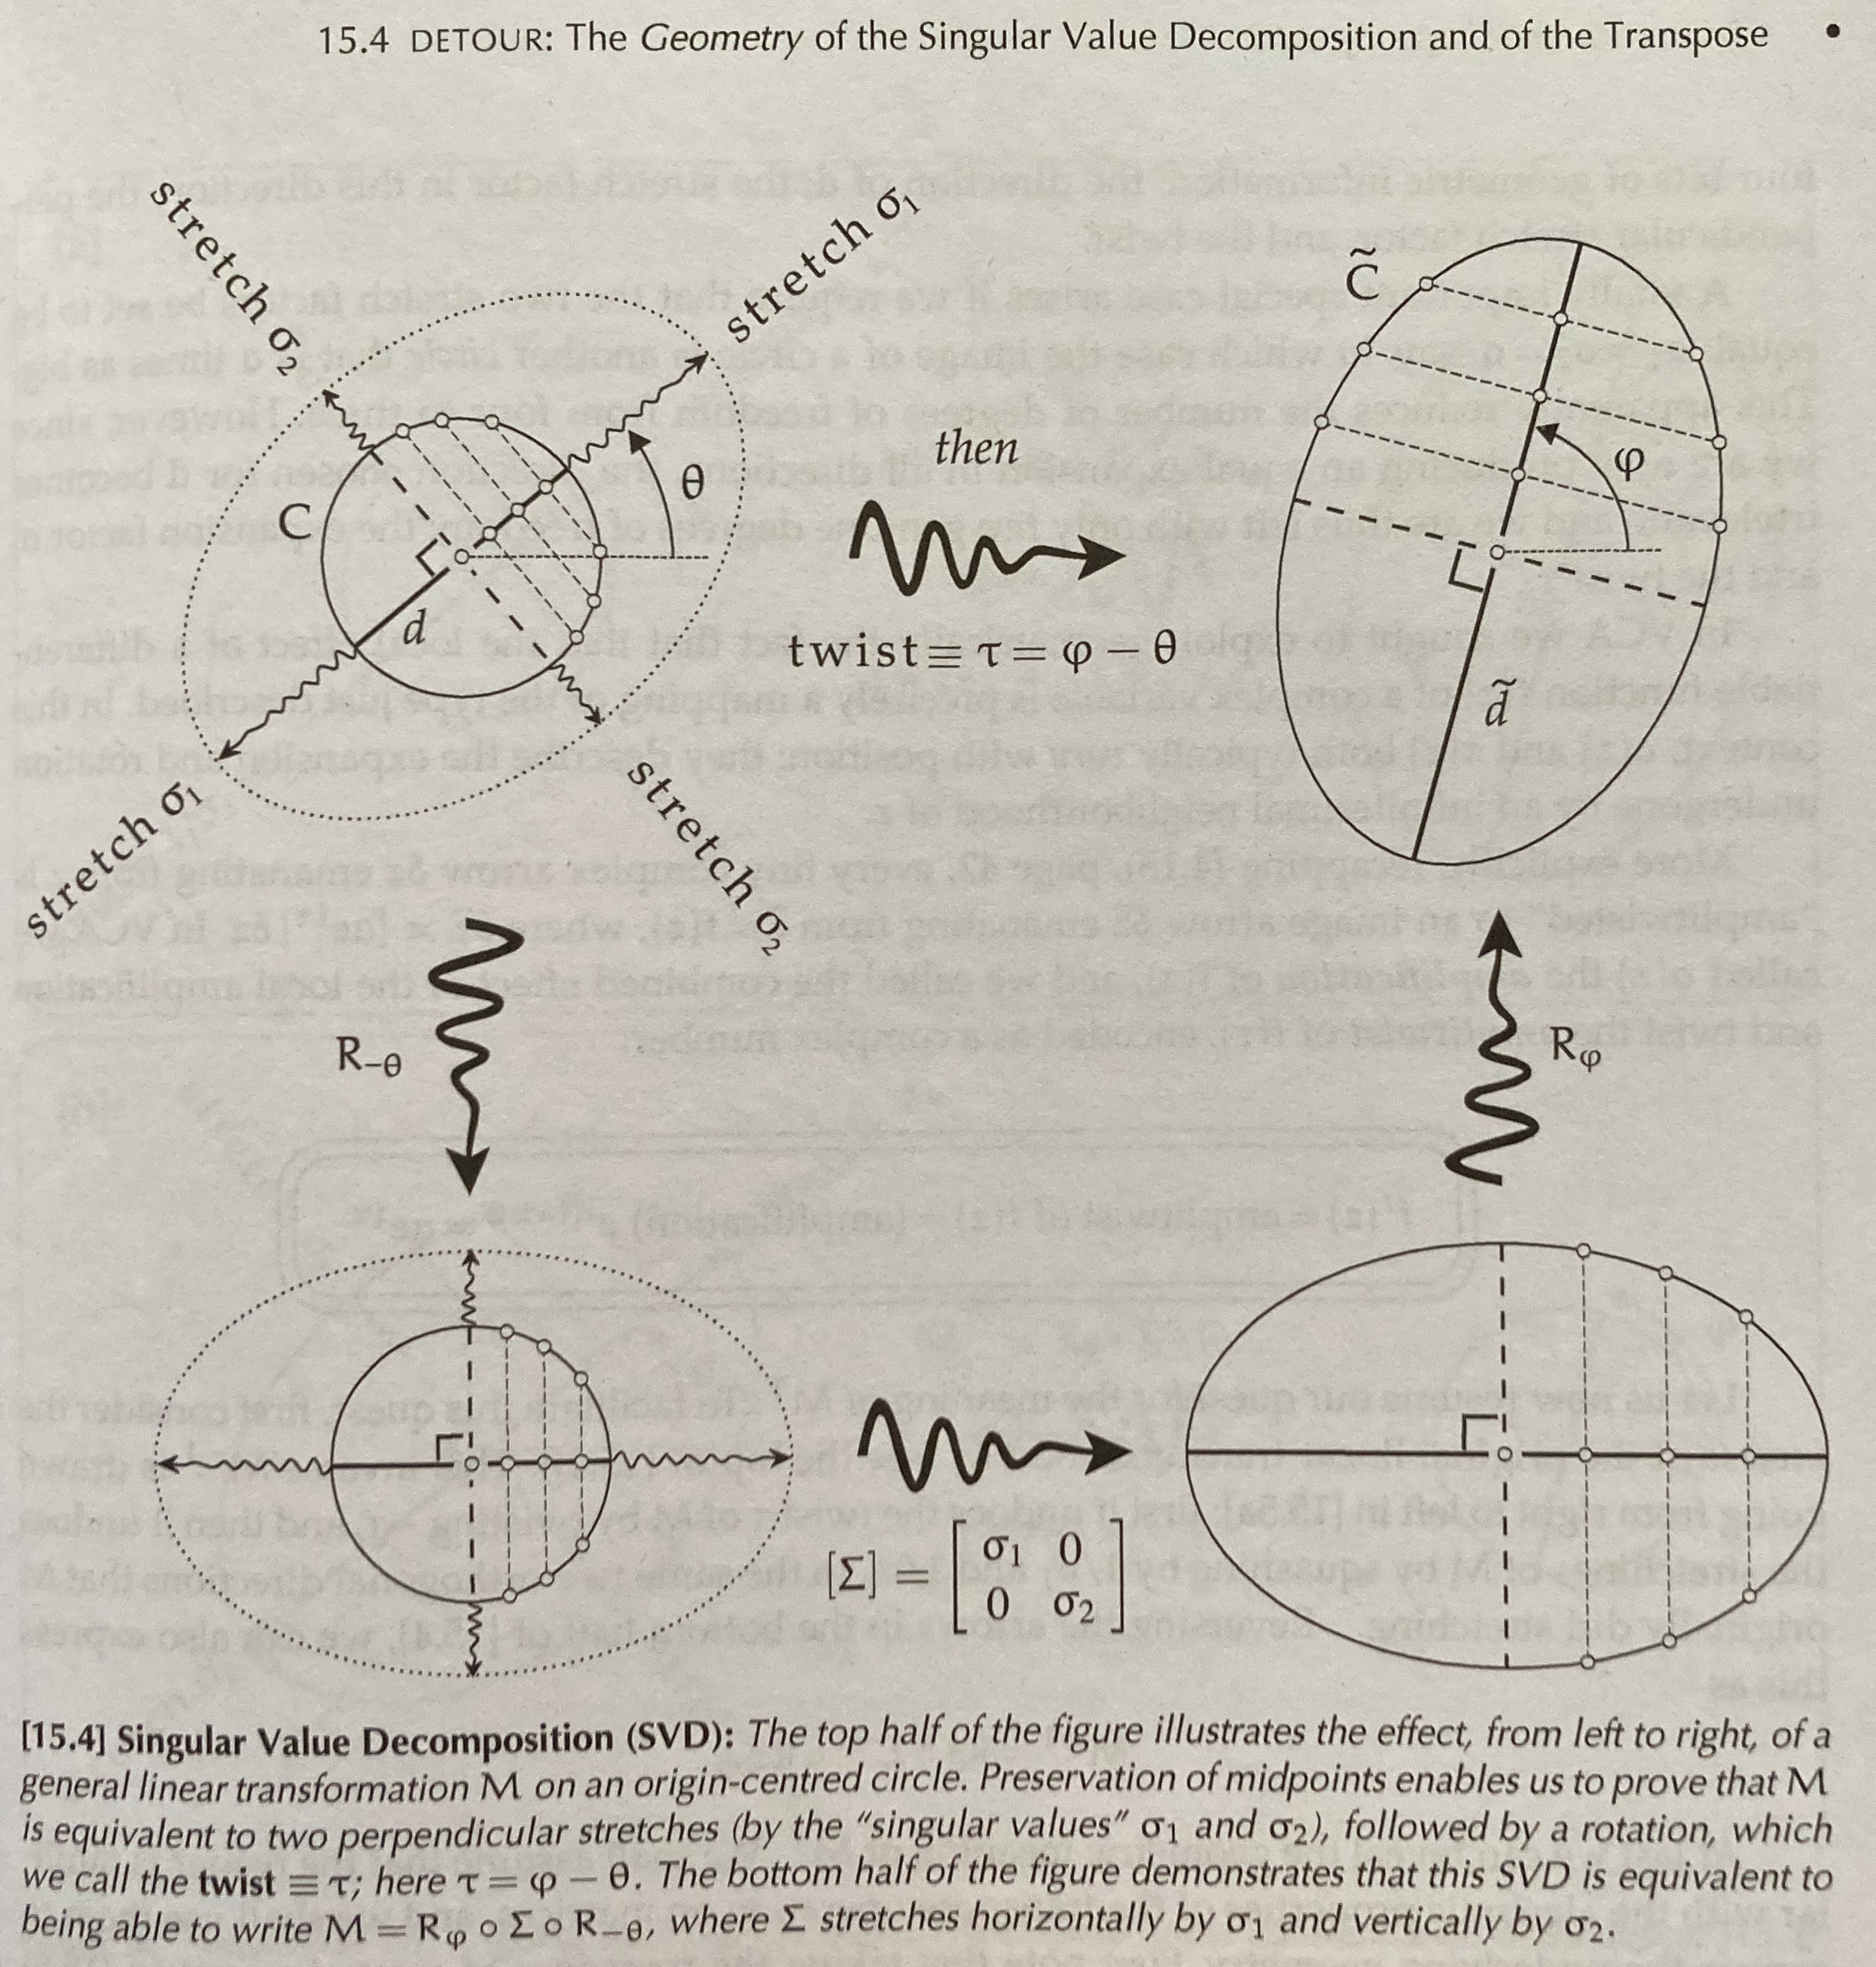

To see the power of this proof, you need to convince yourself of the following properties of linear maps:
- 0 is mapped to 0
- straight lines are mapped to straight lines
- the midpoint of a line segment maps to the mid point of the image line segment

The latter is easily shown as follows: consider the line segment defined by two points $P$ and $Q$. Any point point on a line segment between $P$ and $Q$ can be expressed as $\lambda P + (1 - \lambda Q)$ for $0 \le \lambda \le 1$.

Now apply a linear map to $P$ and $Q$, leading to $P^\prime$ and to $Q^\prime$. So $\mathcal{M}P = P^\prime$ and $\mathcal{M}Q = Q^\prime$. By linearity of $\mathcal{M}$, we have:
$$
\mathcal{M}[\lambda P + (1 -\lambda) Q] = \lambda \mathcal{M}P + (1 - \lambda) \mathcal{M}Q  = \lambda P^\prime + (1 - \lambda)Q^\prime
$$
This shows that straight line segments are mapped to straight line segments, and also that ratios of distances are preserved by linear maps. In particular mid points of line segments remain mid points of the image line segment.

Now have a look at  the figure. The thick centre line in the top left circle labeled $C$, is chosen to coincide with one of the directions in which 
we stretch, $\sigma_1$. The dashed lines between the beads at the circle edge are in the perpendicular direction, i.e. the other strech direction,  $\sigma_2$. The segments are bisected by the thick line. After a rotation, the top right figure results, labeled $\tilde{C}$.

How can we implement this in matrixc algebra? The figure also indicates this. 
- First, we orient the stretch directions to align with the coordinate axes.
- Then we implement the stretch along the $x-$ and $y$-axis. **This requires a diagonal matrix with $\sigma_1$, $\sigma_2$ on the diagonal.
- Then we again apply a rotation matrix to bring the allipse in its final rotation.

The upshot is that any matrix $\mathcal{M}$ can be written as follows:
$$
\mathcal{M} = \mathcal{R}_{\phi} \Sigma \mathcal{R}_{-\theta},
$$
where $\Sigma$ stretches horizontally by $\sigma_1$ and vertically by $\sigma_2$,  $\mathcal{R}_{\theta}$ a rotation matrix determined by the original strech directions, and $\mathcal{R}_\phi$ a rotation matrix determined by the final rotation of the ellipse.

This decomposition, called the SVD decomposition is a central result in computer science.

## Transposition of Matrices

The transposed of a matrix is obtained by mirroring the elements in the main diagonal.
Given a matrix $M$
$$
M = \begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
$$,
the transposed is defined as:
$$
M^T = \begin{pmatrix}
a & c \\
b & d
\end{pmatrix}
$$

It is not difficult to show that:
$$
(AB)^T = B^T A^T
$$

Let the components of $A$ be $a_{ij}$ and those of $B$ be $b_{kl}$. It is then clear that the components od $A^T$ are $a_{ji}$ and similarly for B. The transpose of the matrix product $AB$ follows from the definition:
$$
(AB)^T = (\sum_j a_{ij}b_{jk})^T = \sum_j a_{kj}b_{ji} = \sum_j b_{ji} a_{kj} = \sum_j b^T_{ij}a^T_{jk} = B^T A^T
$$

A matrix $S$ is symmetric if and only if:
$$
S^T = S.
$$

## Rotation Matrices

Rotation matrices transform vectors but leave there length invariant. Consider any rotation matrix $\mathcal{R}$, in any dimension,
operation on a vector $\boldsymbol{v}$.

The length of a vector $\boldsymbol{v}$ is given by the scalar product $\boldsymbol{v}^T \boldsymbol{v}$. A rotation shouldn't affect
the length of a vector, so a condition imposed by rotations is:
$$
(\mathcal{R} \boldsymbol{v})^T (\mathcal{R} \boldsymbol{v}) = \boldsymbol{v}^T \boldsymbol{v}
$$
Now, the left hand side works out as
$$
\boldsymbol{v}^T \mathcal{R}^T \mathcal{R} \boldsymbol{v} = \boldsymbol{v}^T \boldsymbol{v}
$$

This is only true if:
$$
\mathcal{R}^T = \mathcal{R}^{-1}
$$

Although it is not always easy to recognise what kind of rotation a matrix represent (i.e., which angles along which axes), it is dead easy
to recognise whether a matrix is a rotation matricx: you just transpose it and multiply it to itself. The result should be the unit matrix.




## SVD in Python

How does one find the singular values? How does one determine the matrices $\mathcal{R}_{\theta}$ and $R_{\phi}$? In general, using
numerical methods. *Scipy's* SVD decomposition takes a matrix $\mathcal{M}$ and produces three matrices,
$\mathcal{U}$, $\mathcal{D}$ and $\mathcal{Vh}$ such that $\mathcal{D}$ is guaranteed to be diangonal, and its main diagonal
contains the *singular values*, and that
$$
\mathcal{M} = \mathcal{U} \mathcal{M} \mathcal{Vh}
$$

One would expect that $\mathcal{U}$ and $\mathcal{Vh}$ are rotation matrices, based on the above. This is *almost* true. Have a look
at the following plots produced by the code below.


(2, 2)


Text(0.9, 0.9, 'e)')

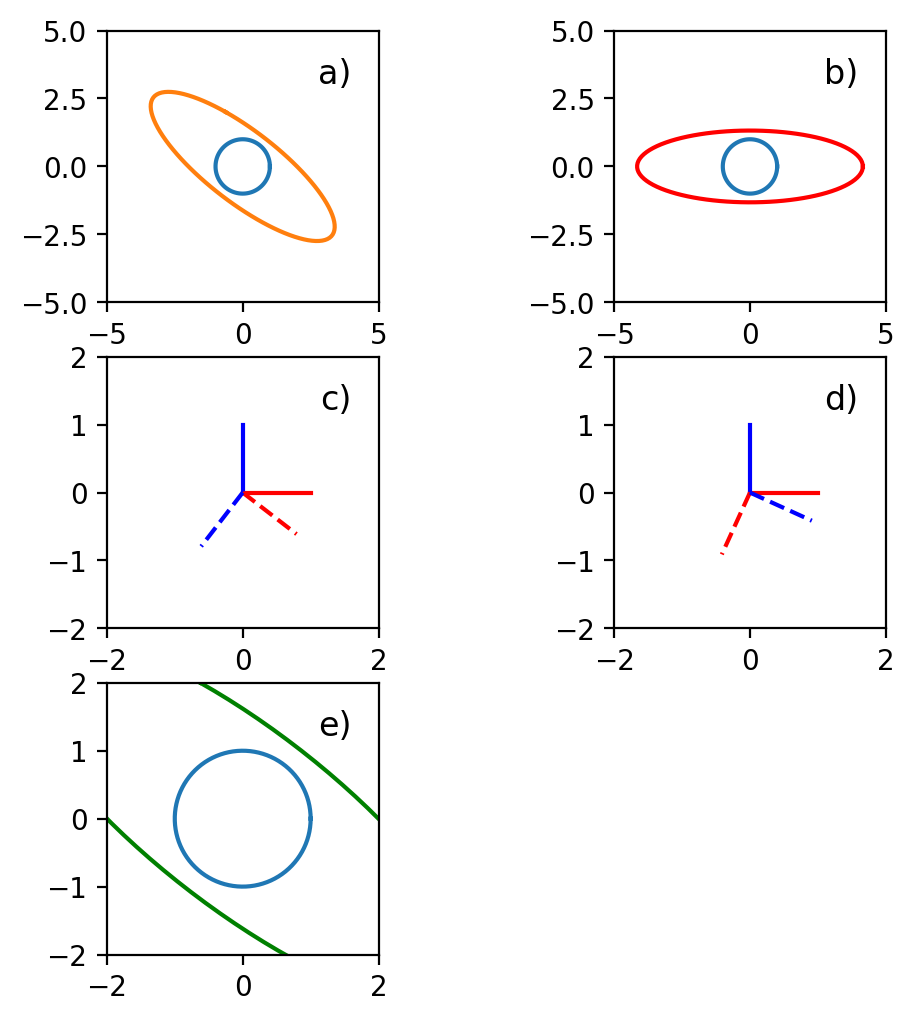

In [3]:
## SVD in Python

    
def rotation_matrix_2D(angle):
    return np.array([[np.cos(angle), -np.sin(angle)],[np.sin(angle), np.cos(angle)]])


# Generate a random matrix
m=generate_some_random_matrix_in_the_plane(low=low, high=high)
transformed = m.dot(data)


figure_svd = plt.figure()
ax_svd = figure_svd.add_subplot(3,2,1)
ax_svd.plot(x,y)
ax_svd.plot(transformed[0], transformed[1])

# Set consistent limits for all plots
ax_svd.set_xlim(low, high)
ax_svd.set_ylim(low, high)
ax_svd.set_aspect('equal')
# Adding the text label at 80% of the top right corner
ax_svd.text(0.9, 0.9, 'a)', transform=ax_svd.transAxes, 
        fontsize=12, verticalalignment='top', horizontalalignment='right')



U, S, Vh = np.linalg.svd(m, full_matrices=True)

diag=np.diag(S)
stretch=diag.dot(data)

ax_ellipse = figure_svd.add_subplot(3,2,2)
ax_ellipse.plot(x,y)
ax_ellipse.plot(stretch[0],stretch[1],c='r')

# Set consistent limits for all plots
ax_ellipse.set_xlim(low, high)
ax_ellipse.set_ylim(low, high)
ax_ellipse.set_aspect('equal')
# Adding the text label at 80% of the top right corner
ax_ellipse.text(0.9, 0.9, 'b)', transform=ax_ellipse.transAxes, 
        fontsize=12, verticalalignment='top', horizontalalignment='right')


def show_matrix_effect(m, scale = 1., N = 100):
    # generate a linspace (0,1) representing the x-axis, and linspace (0, 1) representing the y-axis
    # apply matrix m to these linspaces so that the effect of matrix m on the unit axes can be visualized
    # returns 4 sets of coordinates: original x-axis, original y-axis, transformed x-axis, transformed y-axis
    xseg1 = np.linspace(0., scale*1., N)
    xseg2 = np.zeros(N)   
    x_axis = np.array([xseg1, xseg2])

    yseg1 = np.zeros(N)
    yseg2 = np.linspace(0, scale*1., N)

    y_axis = np.array([yseg1, yseg2])

    x_prime = m.dot(x_axis)
    y_prime = m.dot(y_axis)

    return x_axis, y_axis, x_prime, y_prime

# What does the U matrix do?
ax_u = figure_svd.add_subplot(3,2,3)
xu, yu, xuprime, yuprime = show_matrix_effect(U)
ax_u.plot(xu[0],xu[1],'r')
ax_u.plot(yu[0],yu[1],'b')
ax_u.plot(xuprime[0], xuprime[1],'r--')
ax_u.plot(yuprime[0], yuprime[1],'b--')

low  = -2.
high =  2.
ax_u.set_xlim(low, high)
ax_u.set_ylim(low, high)
ax_u.set_aspect('equal')
# Adding the text label at 80% of the top right corner
ax_u.text(0.9, 0.9, 'c)', transform=ax_u.transAxes, 
        fontsize=12, verticalalignment='top', horizontalalignment='right')


# What does the Vh matrix do?
ax_v = figure_svd.add_subplot(3,2,4)
xv, yv, xuprime, yuprime = show_matrix_effect(Vh)
ax_v.plot(xv[0],xv[1],'r')
ax_v.plot(yv[0],yv[1],'b')
ax_v.plot(xuprime[0], xuprime[1],'r--')
ax_v.plot(yuprime[0], yuprime[1],'b--')

low  = -2.
high =  2.
ax_v.set_xlim(low, high)
ax_v.set_ylim(low, high)
ax_v.set_aspect('equal')
# Adding the text label at 80% of the top right corner
ax_v.text(0.9, 0.9, 'd)', transform=ax_v.transAxes, 
        fontsize=12, verticalalignment='top', horizontalalignment='right')


newm = U@np.diag(S)@Vh

# What does the Vh matrix do?
ax_total = figure_svd.add_subplot(3,2,5)
ax_total.plot(x,y)
newtransformed = newm.dot(data)
print(newm.shape)
ax_total.plot(newtransformed[0],newtransformed[1],c='g')

ax_total.set_xlim(low, high)
ax_total.set_ylim(low, high)
ax_total.set_aspect('equal')
# Adding the text label at 80% of the top right corner
ax_total.text(0.9, 0.9, 'e)', transform=ax_total.transAxes, 
        fontsize=12, verticalalignment='top', horizontalalignment='right')



## Discussion of Python SVD results.

First, note that you can (and should!) repeate the experiment above by running the cell again, as every new run will generate a new random matrix. The plot a) is simply a repeat of the experiment we did above: an arbitrary random matrix maps the unit circle to an ellipse.
Then, with SVD decomposition, we extract the singulare values. In plot b) we apply a stretch, using these values to the $x$- and $y-$ axes.
Since the ellipse has the same shape, albeit at a different orientation, as the one produced by the original matrix we can have some confidence that the singular values are correct.

To examine the effect of the $\mathcal{U}$ matrix, it is useful to visualize where the unit axes are mapped. The $x$-axis is mapped
to the first column  of $\mathcal{U}$, the $y$-axis  to the second column. **(Why?)**. The red axis is mapped to the dashed red axis
and similarly for the blue one. This visualisation in plot c) shows that the effect of the $\mathcal{U}$ matrix is a rotation combined by an axis flip! It is a rotation because the image vectors are still perpendicular, but the axes are reversed as well.

The numerical implementation is free to arrive at a solution which flips the axes (note that the axis flip caused bu $\mathcal{U}$ will be reversed by $\mathcal{Vh}$ and the implementation makes no guarantee on how the singular values are ordered.).

In plot e), the result of the total SVD product is compared to the effect of the original matrix, shown in a). They clearly match.




## The Spectral Theorem for Symmetric Matrices

For a symmetric matrix $S$, the SVD decomposition states:
$$
S = \mathcal{R}_{\phi} \Sigma \mathcal{R}_{-\theta}
$$

Symmetry requires $S^T = S$. So,
$$
\mathcal{R}_{\phi} \mathcal{\Sigma} \mathcal{R}_{-\theta} = (\mathcal{R}_{\phi} \mathcal{\Sigma} \mathcal{R}_{-\theta})^T 
= \mathcal{R}_{-\theta}^T \mathcal{\Sigma}^T \mathcal{R}^T_{\phi} = \mathcal{R}^{-1}_{-\theta} \mathcal{\Sigma} \mathcal{R}^{-1}_{\phi} =
\mathcal{R}_{\theta} \mathcal{\Sigma} \mathcal{R}_{-\phi}
$$

This can only be true if $\phi = \theta$, so a symmetric matrix can be expressed as:
$$
S = \mathcal{R}_{\theta} \Sigma \mathcal{R}_{-\theta}
$$

The spectral decomposition has important consequences:
Carefully consider the following questions:
1. The columns of matrix $\mathcal{R}_{\theta}$ are eigenvectors of $S$. Why?
2. Would you be able to explain why the eigenvectors for $\mathcal{R}_{\theta}$ form a set of coordinate axes that are rotated with respect to the standard axes?

If you can answer these questions, you understand the essence of the spectral decomposition theorem.
